In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score

## 1. Import Data Frame

In [2]:
df = pd.read_csv('nba_all_season.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


## 2. Cleaning Data

In [3]:
# Check NaN di data
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
best_player          0
dtype: int64

Tidak ada NaN value di data, tetapi ada satu kolom yaitu ``Unnamed: 0.1`` yang saya cek itu sama seperti kolom ``Unnamed:0``. Jadi, kolom ``Unnamed:0.1`` tidak diperlukan untuk analisis. Maka kolom tersebut saya hapus.

In [4]:
df = df.drop(['Unnamed: 0.1'], axis=1)

In [5]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [6]:
# pemilihan feature yang akan dipakai
df1 = df[['age', 'player_height', 'player_weight', 'pts', 'reb', 'gp', 'best_player']]
df1.head()

,age,player_height,player_weight,pts,reb,gp,best_player
0,36.0,198.12,99.790240,5.7,16.1,55,0
1,28.0,215.90,117.933920,2.3,1.5,15,0
2,39.0,205.74,95.254320,0.8,1.0,9,0
3,24.0,203.20,100.697424,3.7,2.3,64,0
4,34.0,205.74,108.862080,2.4,2.4,27,0


In [7]:
# standardize data
col = df1.columns
scale = StandardScaler()
result_scale = scale.fit_transform(df1)
df1_scale = pd.DataFrame(result_scale,columns=col)

In [8]:
df1_scale

,age,player_height,player_weight,pts,reb,gp,best_player
0,2.033006,-0.292998,-0.067402,-0.408829,5.025470,0.119440,-0.143216
1,0.191372,1.641595,1.375352,-0.981681,-0.825572,-1.476196,-0.143216
2,2.723619,0.536113,-0.428090,-1.234410,-1.025951,-1.715542,-0.143216
3,-0.729445,0.259743,0.004736,-0.745801,-0.504967,0.478458,-0.143216
4,1.572598,0.536113,0.653975,-0.964832,-0.464892,-0.997505,-0.143216
...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.164023,0.737377,0.438567,-0.143216
11141,-0.959649,-0.569369,-0.247746,-1.167015,-1.306480,-1.476196,-0.143216
11142,0.191372,1.365225,1.375352,-0.341434,0.617150,-0.119905,-0.143216
11143,-0.038832,0.812484,0.329355,-1.015378,-0.224438,-1.276742,-0.143216


## 3. Visualisasi Data

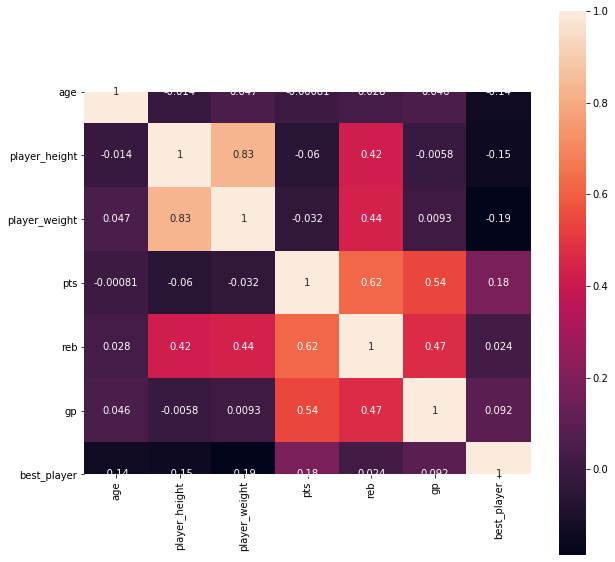

In [9]:
# Heatmap korelasi
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df1_scale.corr(), cbar=True, square=True, annot=True)

Jika dilihat dari nilai korelasinya sebesar ``0.42``, hubungan antara ``tinggi badan`` dengan rata-rata ``rebound`` cukup berpengaruh.
Hubungan antara ``berat badan`` dengan rata-rata ``rebound`` juga cukup mempengaruhi dengan nilai korelasi sebesar ``0.44``.

In [10]:
half = int(len(df1_scale)/2)
df1_scale.iloc[half-1]

age             -0.499241
player_height    0.536113
player_weight    0.942526
pts              0.180872
reb              0.577075
gp               0.677913
best_player     -0.143216
Name: 5571, dtype: float64

#### Prediksi lr dari tinggi badan dengan rebound

In [11]:
lr = LinearRegression()
lr.fit(df1_scale[['player_height']], df1_scale['reb'])
df1_scale['pred_hr'] = lr.predict(df1_scale[['player_height']])

In [12]:
df1_scale['reb_pred'] = df1_scale['pred_hr'].apply(lambda x: 0 if x < 0.6 else 1)
df1_scale

,age,player_height,player_weight,pts,reb,gp,best_player,pred_hr,reb_pred
0,2.033006,-0.292998,-0.067402,-0.408829,5.025470,0.119440,-0.143216,-0.123806,0
1,0.191372,1.641595,1.375352,-0.981681,-0.825572,-1.476196,-0.143216,0.693651,1
2,2.723619,0.536113,-0.428090,-1.234410,-1.025951,-1.715542,-0.143216,0.226533,0
3,-0.729445,0.259743,0.004736,-0.745801,-0.504967,0.478458,-0.143216,0.109754,0
4,1.572598,0.536113,0.653975,-0.964832,-0.464892,-0.997505,-0.143216,0.226533,0
...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.164023,0.737377,0.438567,-0.143216,0.343313,0
11141,-0.959649,-0.569369,-0.247746,-1.167015,-1.306480,-1.476196,-0.143216,-0.240585,0
11142,0.191372,1.365225,1.375352,-0.341434,0.617150,-0.119905,-0.143216,0.576872,0
11143,-0.038832,0.812484,0.329355,-1.015378,-0.224438,-1.276742,-0.143216,0.343313,0


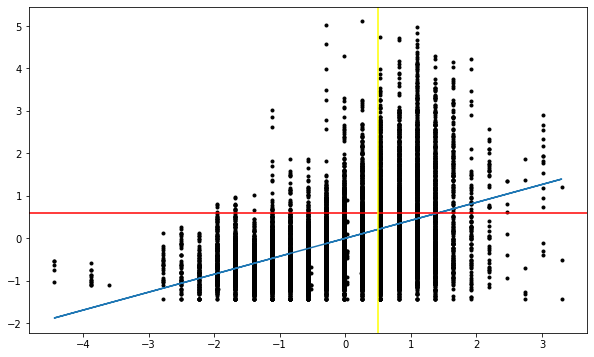

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df1_scale['player_height'],df1_scale['reb'],'k.')
plt.plot(df1_scale['player_height'], df1_scale['pred_hr'])
plt.axhline(0.6, color='red')
plt.axvline(x=0.5, ymin=0, ymax=1, color='yellow')

plt.show()

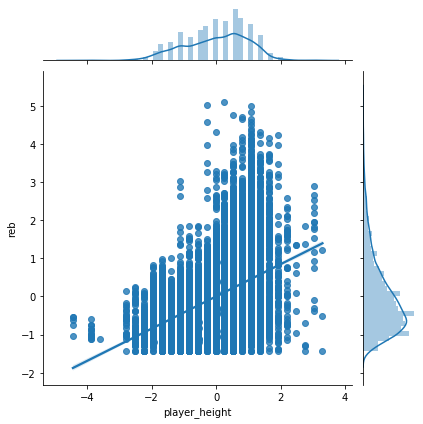

In [14]:
sns.jointplot(x='player_height', y='reb', data = df1_scale, kind='reg')

In [15]:
half = int(len(df1_scale)/2)
df1_scale.iloc[half-1]

age             -0.499241
player_height    0.536113
player_weight    0.942526
pts              0.180872
reb              0.577075
gp               0.677913
best_player     -0.143216
pred_hr          0.226533
reb_pred         0.000000
Name: 5571, dtype: float64

#### Prediksi lr dari rebound dengan pts

In [16]:
lr = LinearRegression()
lr.fit(df1_scale[['reb']], df1_scale['pts'])
df1_scale['pred_rp'] = lr.predict(df1_scale[['reb']])

In [17]:
df1_scale['pts_pred'] = df1_scale['pred_rp'].apply(lambda x: 0 if x < 0.2 else 1)
df1_scale

,age,player_height,player_weight,pts,reb,gp,best_player,pred_hr,reb_pred,pred_rp,pts_pred
0,2.033006,-0.292998,-0.067402,-0.408829,5.025470,0.119440,-0.143216,-0.123806,0,3.135436,1
1,0.191372,1.641595,1.375352,-0.981681,-0.825572,-1.476196,-0.143216,0.693651,1,-0.515082,0
2,2.723619,0.536113,-0.428090,-1.234410,-1.025951,-1.715542,-0.143216,0.226533,0,-0.640100,0
3,-0.729445,0.259743,0.004736,-0.745801,-0.504967,0.478458,-0.143216,0.109754,0,-0.315054,0
4,1.572598,0.536113,0.653975,-0.964832,-0.464892,-0.997505,-0.143216,0.226533,0,-0.290050,0
...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.164023,0.737377,0.438567,-0.143216,0.343313,0,0.460056,1
11141,-0.959649,-0.569369,-0.247746,-1.167015,-1.306480,-1.476196,-0.143216,-0.240585,0,-0.815125,0
11142,0.191372,1.365225,1.375352,-0.341434,0.617150,-0.119905,-0.143216,0.576872,0,0.385046,1
11143,-0.038832,0.812484,0.329355,-1.015378,-0.224438,-1.276742,-0.143216,0.343313,0,-0.140029,0


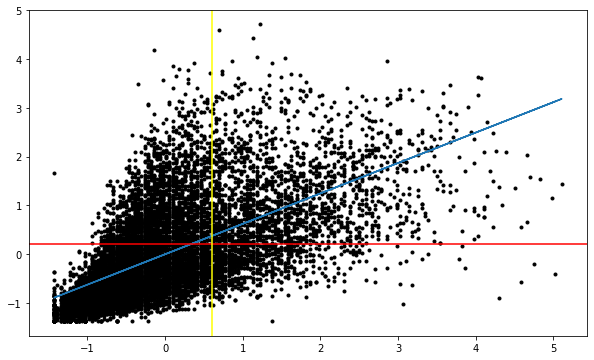

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df1_scale['reb'],df1_scale['pts'],'k.')
plt.plot(df1_scale['reb'], df1_scale['pred_rp'])
plt.axhline(0.2, color='red')
plt.axvline(x=0.6, ymin=0, ymax=1, color='yellow')

plt.show()

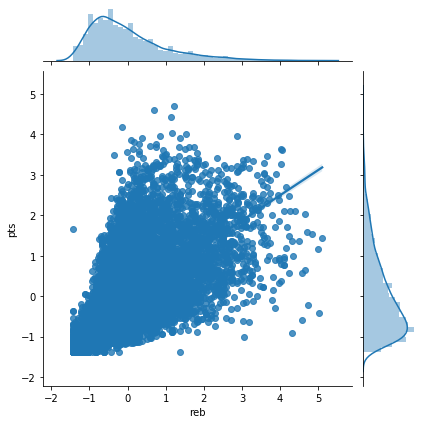

In [19]:
sns.jointplot(x='reb', y='pts', data = df1_scale, kind='reg')

In [20]:
half = int(len(df1_scale)/2)
df1_scale.iloc[half-1]

age             -0.499241
player_height    0.536113
player_weight    0.942526
pts              0.180872
reb              0.577075
gp               0.677913
best_player     -0.143216
pred_hr          0.226533
reb_pred         0.000000
pred_rp          0.360042
pts_pred         1.000000
Name: 5571, dtype: float64

#### Prediksi lr dari berat badan dengan rebound

In [21]:
lr = LinearRegression()
lr.fit(df1_scale[['player_weight']], df1_scale['reb'])
df1_scale['pred_wr'] = lr.predict(df1_scale[['player_weight']])

In [22]:
df1_scale['reb_predw'] = df1_scale['pred_wr'].apply(lambda x: 0 if x < 0.6 else 1)
df1_scale

,age,player_height,player_weight,pts,reb,gp,best_player,pred_hr,reb_pred,pred_rp,pts_pred,pred_wr,reb_predw
0,2.033006,-0.292998,-0.067402,-0.408829,5.025470,0.119440,-0.143216,-0.123806,0,3.135436,1,-0.029439,0
1,0.191372,1.641595,1.375352,-0.981681,-0.825572,-1.476196,-0.143216,0.693651,1,-0.515082,0,0.600701,1
2,2.723619,0.536113,-0.428090,-1.234410,-1.025951,-1.715542,-0.143216,0.226533,0,-0.640100,0,-0.186973,0
3,-0.729445,0.259743,0.004736,-0.745801,-0.504967,0.478458,-0.143216,0.109754,0,-0.315054,0,0.002068,0
4,1.572598,0.536113,0.653975,-0.964832,-0.464892,-0.997505,-0.143216,0.226533,0,-0.290050,0,0.285631,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.164023,0.737377,0.438567,-0.143216,0.343313,0,0.460056,1,0.285631,0
11141,-0.959649,-0.569369,-0.247746,-1.167015,-1.306480,-1.476196,-0.143216,-0.240585,0,-0.815125,0,-0.108206,0
11142,0.191372,1.365225,1.375352,-0.341434,0.617150,-0.119905,-0.143216,0.576872,0,0.385046,1,0.600701,1
11143,-0.038832,0.812484,0.329355,-1.015378,-0.224438,-1.276742,-0.143216,0.343313,0,-0.140029,0,0.143850,0


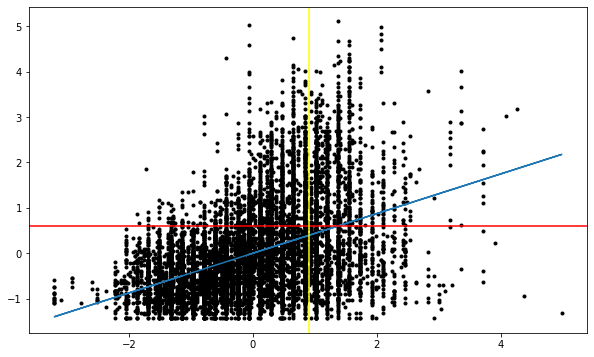

In [23]:
plt.figure(figsize=(10,6))
plt.plot(df1_scale['player_weight'],df1_scale['reb'],'k.')
plt.plot(df1_scale['player_weight'], df1_scale['pred_wr'])
plt.axhline(0.6, color='red')
plt.axvline(x=0.9, ymin=0, ymax=1, color='yellow')

plt.show()

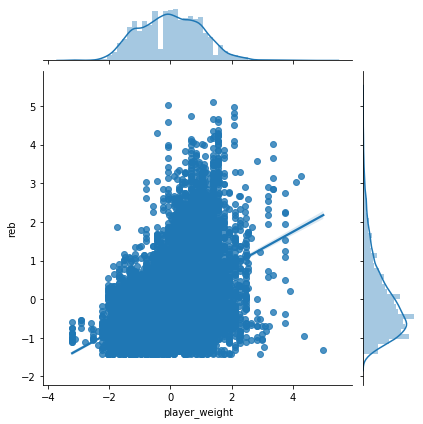

In [24]:
sns.jointplot(x='player_weight', y='reb', data = df1_scale, kind='reg')

In [25]:
half = int(len(df1_scale)/2)
df1_scale.iloc[half-1]

age             -0.499241
player_height    0.536113
player_weight    0.942526
pts              0.180872
reb              0.577075
gp               0.677913
best_player     -0.143216
pred_hr          0.226533
reb_pred         0.000000
pred_rp          0.360042
pts_pred         1.000000
pred_wr          0.411659
reb_predw        0.000000
Name: 5571, dtype: float64

#### Prediksi lr dari pts dengan game played (gp)

In [26]:
lr = LinearRegression()
lr.fit(df1_scale[['pts']], df1_scale['gp'])
df1_scale['pred_pg'] = lr.predict(df1_scale[['pts']])

In [27]:
df1_scale['gp_pred'] = df1_scale['pred_pg'].apply(lambda x: 0 if x < 0.7 else 1)
df1_scale

,age,player_height,player_weight,pts,reb,gp,best_player,pred_hr,reb_pred,pred_rp,pts_pred,pred_wr,reb_predw,pred_pg,gp_pred
0,2.033006,-0.292998,-0.067402,-0.408829,5.025470,0.119440,-0.143216,-0.123806,0,3.135436,1,-0.029439,0,-0.222340,0
1,0.191372,1.641595,1.375352,-0.981681,-0.825572,-1.476196,-0.143216,0.693651,1,-0.515082,0,0.600701,1,-0.533883,0
2,2.723619,0.536113,-0.428090,-1.234410,-1.025951,-1.715542,-0.143216,0.226533,0,-0.640100,0,-0.186973,0,-0.671328,0
3,-0.729445,0.259743,0.004736,-0.745801,-0.504967,0.478458,-0.143216,0.109754,0,-0.315054,0,0.002068,0,-0.405600,0
4,1.572598,0.536113,0.653975,-0.964832,-0.464892,-0.997505,-0.143216,0.226533,0,-0.290050,0,0.285631,0,-0.524720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.164023,0.737377,0.438567,-0.143216,0.343313,0,0.460056,1,0.285631,0,0.089203,0
11141,-0.959649,-0.569369,-0.247746,-1.167015,-1.306480,-1.476196,-0.143216,-0.240585,0,-0.815125,0,-0.108206,0,-0.634676,0
11142,0.191372,1.365225,1.375352,-0.341434,0.617150,-0.119905,-0.143216,0.576872,0,0.385046,1,0.600701,1,-0.185688,0
11143,-0.038832,0.812484,0.329355,-1.015378,-0.224438,-1.276742,-0.143216,0.343313,0,-0.140029,0,0.143850,0,-0.552209,0


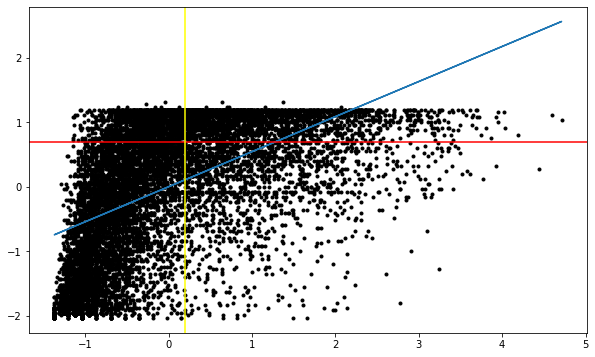

In [28]:
plt.figure(figsize=(10,6))
plt.plot(df1_scale['pts'],df1_scale['gp'],'k.')
plt.plot(df1_scale['pts'], df1_scale['pred_pg'])
plt.axhline(0.7, color='red')
plt.axvline(x=0.2, ymin=0, ymax=1, color='yellow')

plt.show()

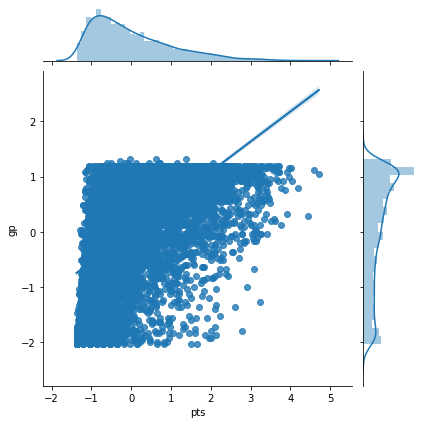

In [29]:
sns.jointplot(x='pts', y='gp', data = df1_scale, kind='reg')

In [30]:
half = int(len(df1_scale)/2)
df1_scale.iloc[half-1]

age             -0.499241
player_height    0.536113
player_weight    0.942526
pts              0.180872
reb              0.577075
gp               0.677913
best_player     -0.143216
pred_hr          0.226533
reb_pred         0.000000
pred_rp          0.360042
pts_pred         1.000000
pred_wr          0.411659
reb_predw        0.000000
pred_pg          0.098366
gp_pred          0.000000
Name: 5571, dtype: float64

#### Prediksi lr dari rebound dengan game played (gp)

In [31]:
lr = LinearRegression()
lr.fit(df1_scale[['reb']], df1_scale['gp'])
df1_scale['pred_rg'] = lr.predict(df1_scale[['reb']])

In [32]:
df1_scale['gp_predr'] = df1_scale['pred_rg'].apply(lambda x: 0 if x < 0.7 else 1)
df1_scale

,age,player_height,player_weight,pts,reb,gp,best_player,pred_hr,reb_pred,pred_rp,pts_pred,pred_wr,reb_predw,pred_pg,gp_pred,pred_rg,gp_predr
0,2.033006,-0.292998,-0.067402,-0.408829,5.025470,0.119440,-0.143216,-0.123806,0,3.135436,1,-0.029439,0,-0.222340,0,2.369821,1
1,0.191372,1.641595,1.375352,-0.981681,-0.825572,-1.476196,-0.143216,0.693651,1,-0.515082,0,0.600701,1,-0.533883,0,-0.389309,0
2,2.723619,0.536113,-0.428090,-1.234410,-1.025951,-1.715542,-0.143216,0.226533,0,-0.640100,0,-0.186973,0,-0.671328,0,-0.483799,0
3,-0.729445,0.259743,0.004736,-0.745801,-0.504967,0.478458,-0.143216,0.109754,0,-0.315054,0,0.002068,0,-0.405600,0,-0.238123,0
4,1.572598,0.536113,0.653975,-0.964832,-0.464892,-0.997505,-0.143216,0.226533,0,-0.290050,0,0.285631,0,-0.524720,0,-0.219225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.191372,0.812484,0.653975,0.164023,0.737377,0.438567,-0.143216,0.343313,0,0.460056,1,0.285631,0,0.089203,0,0.347719,0
11141,-0.959649,-0.569369,-0.247746,-1.167015,-1.306480,-1.476196,-0.143216,-0.240585,0,-0.815125,0,-0.108206,0,-0.634676,0,-0.616086,0
11142,0.191372,1.365225,1.375352,-0.341434,0.617150,-0.119905,-0.143216,0.576872,0,0.385046,1,0.600701,1,-0.185688,0,0.291025,0
11143,-0.038832,0.812484,0.329355,-1.015378,-0.224438,-1.276742,-0.143216,0.343313,0,-0.140029,0,0.143850,0,-0.552209,0,-0.105836,0


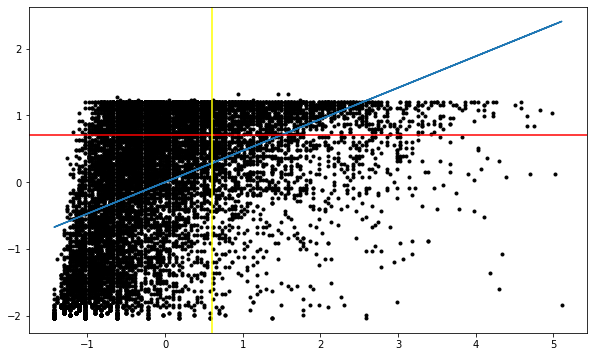

In [33]:
plt.figure(figsize=(10,6))
plt.plot(df1_scale['reb'],df1_scale['gp'],'k.')
plt.plot(df1_scale['reb'], df1_scale['pred_rg'])
plt.axhline(0.7, color='red')
plt.axvline(x=0.6, ymin=0, ymax=1, color='yellow')

plt.show()

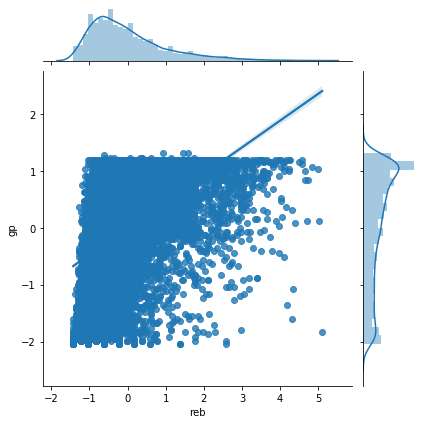

In [34]:
sns.jointplot(x='reb', y='gp', data = df1_scale, kind='reg')

Kesimpulan:
* Tinggi badan dan berat badan pemain mempengaruhi banyaknya ia melakukan rebound.
* ``Rebound`` memiliki korelasi positif dengan ``pts``. Jadi, tingginya nilai pts ada keterkaitannya dengan pemain tsb melakukan berapa banyak rebound.
* Seberapa sering pemain diikutkan dalam pertandingan bisa dilihat dengan banyaknya ia melakukan rebound dan tingginya pts yang dia capai.

## 4. Training Data Set

In [35]:
# split X dan y
X = df1_scale[['age', 'player_height', 'player_weight', 'pts', 'reb', 'gp']]
y = df1_scale['best_player']

In [36]:
# split train
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.78,test_size=0.22, random_state=101)

In [37]:
X_train

,age,player_height,player_weight,pts,reb,gp
8171,-0.729445,-1.122110,-0.969123,2.169005,0.416772,1.196495
8053,-1.420058,-0.845739,-0.788779,-0.071857,-0.665270,0.677913
7378,-0.729445,-2.780333,-1.329811,0.972755,-0.625194,1.076822
1298,0.881985,0.812484,0.906457,0.147175,0.657226,-0.439033
956,0.881985,0.812484,0.293287,-0.408829,0.056092,-0.159796
...,...,...,...,...,...,...
599,-1.189853,-1.674851,-1.582293,-1.116469,-1.306480,-1.755432
5695,1.112189,-0.292998,-0.067402,2.135308,0.617150,1.116713
8006,1.572598,0.812484,0.473631,-0.830043,-0.585119,0.358785
1361,1.342393,0.812484,1.736040,1.444516,1.979722,0.877367


In [38]:
y_train

8171    6.982440
8053   -0.143216
7378   -0.143216
1298   -0.143216
956    -0.143216
          ...   
599    -0.143216
5695   -0.143216
8006   -0.143216
1361   -0.143216
1547   -0.143216
Name: best_player, Length: 8693, dtype: float64

In [39]:
X_test

,age,player_height,player_weight,pts,reb,gp
5198,0.651781,1.917966,1.375352,-1.217561,-1.386631,-1.795323
7144,-0.269036,0.536113,2.421348,0.197720,0.737377,0.358785
3140,-1.880466,0.812484,2.096728,-0.998529,-0.865648,-1.675651
3715,1.342393,3.023448,1.916384,-0.914286,-0.304589,0.997040
3712,1.572598,-0.016628,1.736040,-0.071857,0.256470,0.239113
...,...,...,...,...,...,...
292,-0.038832,0.259743,0.293287,1.393970,0.577075,0.837476
544,1.112189,-1.122110,-1.149467,-0.728952,-0.865648,-0.518814
10602,1.572598,1.641595,1.195007,0.922210,1.739268,1.076822
4861,0.421576,-1.674851,-1.149467,1.511910,-0.144287,1.196495


In [40]:
y_test

5198    -0.143216
7144    -0.143216
3140    -0.143216
3715    -0.143216
3712    -0.143216
           ...   
292     -0.143216
544     -0.143216
10602   -0.143216
4861    -0.143216
1448    -0.143216
Name: best_player, Length: 2452, dtype: float64

In [41]:
print('Xtrain:',X_train.shape)
print('ytrain:',y_train.shape)
print('Xtest:',X_test.shape)
print('ytest:',y_test.shape)

Xtrain: (8693, 6)
ytrain: (8693,)
Xtest: (2452, 6)
ytest: (2452,)


## 5. Logistic Regression

In [42]:
penalty = ['l1','l2','elasticnet']
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
max_iter = [1,10,100,1000,10000]

param = {
    'penalty':penalty,'solver':solver,'max_iter':max_iter
}

In [43]:
model_log = LogisticRegression()
hypertuning = RandomizedSearchCV(estimator=model_log, param_distributions=param, cv=5)

In [44]:
# best parameter untuk logistic regression
hypertuning.fit(X_train,y_train)
hypertuning.best_params_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [ ]:
# logistic hyperparameter tuning
new_log = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000)
new_log.fit(X_train,y_train)
print('Hasil logistic regression parameter tuning',cross_val_score(new_log,X_train,y_train,cv=5).mean())

In [ ]:
# akurasi skor logreg
print('akurasi default',model_log.score(X_test,y_test))
print('akurasi tuning',new_log.score(X_test,y_test))

## 6. Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
param_random = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [int(x) for x in np.arange(10,120,20)],
    'min_samples_split' : [int(x) for x in np.arange(2,32,2)],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
}

rfc_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= param_random,
                              n_iter=10, cv=5, n_jobs=-1, scoring='accuracy')

In [ ]:
rfc_random.fit(X_train,y_train)

In [ ]:
# Best paramaeter untuk random forest
rfc_random.best_params_

In [ ]:
# random forest default
rfc_random.fit(X_train,y_train)
cross_val_score(rfc_random,X_train,y_train,cv=5).mean()

In [ ]:
# random forest parameter tuning
new_forest = RandomForestClassifier(n_estimators=1000,criterion='entropy',bootstrap=False)
new_forest.fit(X_train,y_train)
cross_val_score(new_forest,X_train,y_train,cv=5).mean()

In [ ]:
# akurasi skor random forest
print('akurasi default',model_forest.score(X_test,y_test))
print('akurasi tuning',new_forest.score(X_test,y_test))

## 7. Decision Tree

In [ ]:
criterion = ['gini','entropy']
splitter = ['best','random']
random_state = [2,4,6,8,10]

param = {
    'criterion':criterion,'splitter':splitter,'random_state':random_state
}

In [ ]:
model_tree =DecisionTreeClassifier()
tuning_tree = RandomizedSearchCV(estimator=model_tree, param_distributions=param)

In [ ]:
#best parameter
tuning_tree.fit(X_train, y_train)
tuning_tree.best_params_

In [ ]:
# decision tree default
model_tree.fit(X_train,y_train)
cross_val_score(model_tree,X_train,y_train,cv=5).mean()

In [ ]:
# decision tree tunning
new_tree = DecisionTreeClassifier(splitter='best',random_state=6,criterion='entropy')
new_tree.fit(X_train,y_train)
cross_val_score(new_tree,X_train,y_train,cv=5).mean()

In [ ]:
# akurasi skor decision tree
print('akurasi default',model_tree.score(X_test,y_test))
print('akurasi tuning',new_tree.score(X_test,y_test))

## 8. Evaluation Metrics

In [ ]:
# Evaluasi Metrics untuk logreg
y_pred_log = new_log.predict(X_test)
print('Balanced accuracy:',round(balanced_accuracy_score(y_test,y_pred_log)*100,2),'%')
print('Precision score positive:',round(precision_score(y_test,y_pred_log,pos_label=1)*100,2),'%')
print('Precision score negative:',round(precision_score(y_test,y_pred_log,pos_label=0)*100,2),'%')
print('Recall positive:',round(recall_score(y_test,y_pred_log,pos_label=1)*100,2),'%')
print('Recall negative:',round(recall_score(y_test,y_pred_log,pos_label=0)*100,2),'%')
print('F1 score positive:',round(f1_score(y_test,y_pred_log,pos_label=1)*100,2),'%')
print('F1 score negative:',round(f1_score(y_test,y_pred_log,pos_label=0)*100,2),'%')
print('ROC AUC positive:',round(roc_auc_score(y_test,y_pred_log,labels=1)*100,2),'%')
print('ROC AUC negative:',round(roc_auc_score(y_test,y_pred_log,labels=0)*100,2),'%')

In [ ]:
print(classification_report(y_test,y_pred_log))

In [ ]:
# evaluasi metrics random forest
y_pred_forest = new_forest.predict(X_test)
print('Balanced accuracy:',round(balanced_accuracy_score(y_test,y_pred_forest)*100,2),'%')
print('Precision score positive:',round(precision_score(y_test,y_pred_forest,pos_label=1)*100,2),'%')
print('Precision score negative:',round(precision_score(y_test,y_pred_forest,pos_label=0)*100,2),'%')
print('Recall positive:',round(recall_score(y_test,y_pred_forest,pos_label=1)*100,2),'%')
print('Recall negative:',round(recall_score(y_test,y_pred_forest,pos_label=0)*100,2),'%')
print('F1 score positive:',round(f1_score(y_test,y_pred_forest,pos_label=1)*100,2),'%')
print('F1 score negative:',round(f1_score(y_test,y_pred_forest,pos_label=0)*100,2),'%')
print('ROC AUC positive:',round(roc_auc_score(y_test,y_pred_forest,labels=1)*100,2),'%')
print('ROC AUC negative:',round(roc_auc_score(y_test,y_pred_forest,labels=0)*100,2),'%')

In [ ]:
print(classification_report(y_test,y_pred_forest))

In [ ]:
# Evaluations metrics decission tree
y_pred_tree = new_tree.predict(X_test)
print('Balanced accuracy:',round(balanced_accuracy_score(y_test,y_pred_tree)*100,2),'%')
print('Precision score positive:',round(precision_score(y_test,y_pred_tree,pos_label=1)*100,2),'%')
print('Precision score negative:',round(precision_score(y_test,y_pred_tree,pos_label=0)*100,2),'%')
print('Recall positive:',round(recall_score(y_test,y_pred_tree,pos_label=1)*100,2),'%')
print('Recall negative:',round(recall_score(y_test,y_pred_tree,pos_label=0)*100,2),'%')
print('F1 score positive:',round(f1_score(y_test,y_pred_tree,pos_label=1)*100,2),'%')
print('F1 score negative:',round(f1_score(y_test,y_pred_tree,pos_label=0)*100,2),'%')
print('ROC AUC positive:',round(roc_auc_score(y_test,y_pred_tree,labels=1)*100,2),'%')
print('ROC AUC negative:',round(roc_auc_score(y_test,y_pred_tree,labels=0)*100,2),'%')

In [ ]:
print(classification_report(y_test,y_pred_tree))

## 9. Menggunakan Model

In [ ]:
df_player = pd.read_csv('ibl_player.csv')
df.head()

#### a. Using Logistic Regression Model

In [ ]:
df_player['Predict_Logreg'] = new_log.predict(df_player[col])

In [ ]:
df_player['Predict_Logreg'].replace([1,0], ['Direkrut','Tidak Direkrut'], inplace=True)

#### b. Using Random Forest Model

In [ ]:
df_player['Predict_Forest'] = new_forest.predict(df_player[col])

In [ ]:
df_player['Predict_Forest'].replace([1,0], ['Direkrut','Tidak Direkrut'], inplace=True)

#### b. Using Decission Tree Model

In [ ]:
df_player['Predict_Dectree'] = new_tree.predict(df_player[col])

In [ ]:
df_player['Predict_Dectree'].replace([1,0], ['Direkrut','Tidak Direkrut'], inplace=True)